# Modelado de Topicos con LDA usando NLTK y SKLearn

El modelado de topicos es una tecnica para extraer topicos ocultos en grandes volumnes de datos. Existen varios escenarios donde puede ser útil, como por ejemplo:

   * Clasificación de Textos: agrupandolos por grupos similares de palabras que aparecen con frecuencia juntas. Por ejemplo, clasificación de noticias.
    
   * Sistemas de Recomendación: es posible construir un sistema que recomiende a usuarios items que tengan una estructura similar a los topicos detectados en sus preferencias.
    
Los algoritmos más comunes para el modelado de topicos son: 

   * Latent Dirichlet Allocation (LDA), es un algoritmo que considera a cada documento como una coleccion de topicos y, a cada topico, como una coleccion de palabras.
   
   * Latent Semantic Analysis o Latent Semantic Indexing (LSA o LSI),  usa Singular Value Decomposition (SVD) en la matriz de términos del documento. Está basada en el álgebra lineal.
   

Este trabajo se propone identificar topicos presentes en la descripcion de las API's REST disponibles en el repositorio https://github.com/APIs-guru/openapi-directory/tree/master/APIs con el objetivo de detectar información referida al despligue de una apliacación. La implementación se llevara a cabo con los paquetes NLTK y SKLearn de Python.

**Construccion del Dataset:** El primer paso consistió en acceder a los archivos "swagger.yaml" y "openapi.yaml" contenidos en las api's presentes en el repositorio github nombrado, a fin de obtener la información de los tag "description" y "summary" de cada api.

In [1]:
import sys
import os
import yaml

data_list=[]

for base, dirs, files in os.walk('D:/ISISTAN/Cursos/Mineria de datos/Trabajo topicos/openapi-directory-master/APIs-original'):
    for f in files:
        text_document = ''
        if f == "swagger.yaml" or f == "openapi.yaml":
            data = yaml.safe_load(open(os.path.join(base,f), encoding="utf8"))
            try:
                if 'description' in list(data['info'].keys()):
                    text_document = str(data['info']['description']) + ' '
                    #data_list.append(data['info']['description'])
                    #print(data['info']['description'])
                    
                for api in data['paths'].keys():
                    for methodHTTP in data['paths'][api].keys():
                        #print(data['paths'][api][methodHTTP].keys())
                        if 'summary' in list(data['paths'][api][methodHTTP].keys()):
                            text_document = text_document + str(data['paths'][api][methodHTTP]['summary']) + ' '
                            #print(data['paths'][api][methodHTTP]['summary'])
                            #data_list.append(data['paths'][api][methodHTTP]['summary'])
               
                text_document = text_document[0:len(text_document)-1] #quita el ultimo espacio agregado al final d la cadena
                data_list.append(text_document)
            except (OSError, RuntimeError, TypeError, NameError, AttributeError):
                    pass
    
                
print ('NUMERO DE ELEMENTOS: ' + str(len(data_list)))
print(data_list[:2])

NUMERO DE ELEMENTOS: 1026
['Stock and Forex Data and Realtime Quotes Get quotes for all symbols Get a list of symbols for which we provide real-time quotes', 'Strong authentication, without the passwords.']


**Tokenizacion y Eliminacion de Stopwords:**

In [2]:
import numpy as np
import re, nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from string import ascii_lowercase
import string

#TOKENIZACION CON NLTK
tokenized_data = []
for sentence in data_list:
    tokenized_data.append(word_tokenize(sentence.lower()))

#ELIMINACION DE STOPWORDS
stopwords = stopwords.words('english')
stopwords.extend(['WWW','www','HTTP', 'http', 'HTTPS', 'https', 'api', 'API','apis', 'APIS', 'REST', 'rest','RESTfull',
                  'RESTful', 'restfull', 'restful', 'service', 'services', 'user', 'users','get','post','put','delete',
                  'request', 'response', 'url', 'URL', 'curl','token', 'json', 'crud', 'create', 'update', 'data',
                  'code', 'list', 'tokens', 'urls','html', 'html5','yaml', 'httpclient','httprequest','httpresponse',
                  'client','clients', 'lenguage', 'return', 'type']
                  + list(ascii_lowercase))

wordsFiltered=[]
for sentence in tokenized_data:
    sentences=[]
    for word in sentence:
        if word not in stopwords and word not in string.punctuation and re.match('[a-zA-Z\\-][a-zA-Z\\-]{3,12}', word):
            sentences.append(word)
    wordsFiltered.append(sentences)
print(wordsFiltered[:2])

[['stock', 'forex', 'realtime', 'quotes', 'quotes', 'symbols', 'symbols', 'provide', 'real-time', 'quotes'], ['strong', 'authentication', 'without', 'passwords']]


In [3]:
new_data = []
for words in wordsFiltered:
    text = ' '.join(words)
    new_data.append(text)
new_data

['stock forex realtime quotes quotes symbols symbols provide real-time quotes',
 'strong authentication without passwords',
 'internet things everyone adafruit provides access adafruit programming language hardware environment speak easiest started adafruit learn guide simple internet things capable device like feather huzzah documentation hosted github pages available questions comments visit adafruit forums adafruit-io channel adafruit discord server authentication authentication every happens x-aio-key header query parameter simple available feeds username could look like x-aio-key like x-aio-key=io_key_12345 using node.js library requests easy require options headers function callback error body error response.statuscode feeds json.parse body console.log feeds.length feeds available feeds.foreach function feed console.log feed.name feed.key options callback using arduino library would look like replacing values appropriate locations arduino based include arduino.h include include i

**Lematizacion y Construccion del Vector de Datos:**

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.wordnet import WordNetLemmatizer

lemm = WordNetLemmatizer()
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))

In [5]:
tf_vectorizer = LemmaCountVectorizer(max_df=0.95, 
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')
data_vectorized = tf_vectorizer.fit_transform(new_data)

print("Las caracteristicas son: \n\n {}".format(tf_vectorizer.get_feature_names()) + "\n")
print(data_vectorized.toarray())

Las caracteristicas son: 

 ['100', '_blank', 'abbreviation', 'ability', 'able', 'accept', 'accepted', 'accepts', 'access', 'access_token', 'accessed', 'accessible', 'accessing', 'accident', 'according', 'account', 'accounting', 'accounts_checknameavailability', 'accounts_createorupdate', 'accounts_delete', 'accounts_get', 'accounts_listbyresourcegroup', 'accurate', 'achieved', 'acknowledge', 'action', 'activate', 'activation', 'active', 'activity', 'add', 'added', 'addheader', 'adding', 'addition', 'additional', 'additionally', 'addon', 'address', 'adheres', 'adjustment', 'admin', 'administrate', 'administration', 'administrative', 'administrator', 'advanced', 'advertised', 'advisor', 'adyen', 'affected', 'affiliated', 'agency', 'agent', 'aggregate', 'aggregated', 'aggregation', 'agree', 'agreement', 'airline', 'airport', 'album', 'alert', 'alerting', 'algorithm', 'alias', 'allocation', 'allow', 'allowed', 'allowing', 'allows', 'alongside', 'alternative', 'alternatively', 'analysis', 

**Chequeo de Sparsity:** porcentaje de celdas que no contienen valores nulos.

In [6]:
# Materialize the sparse data
data_dense = data_vectorized.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  0.929762446311551 %


**Inicialización del modelo:** busqueda de los mejores parametros

In [8]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.grid_search import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)

# Define Search Param
search_params = {'n_components': [3, 5, 10, 15], 'learning_decay': [.5, .7, .9], 'max_iter':[10, 20, 30]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)

GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
             n_topics=None, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_components': [3, 5, 10, 15], 'learning_decay': [0.5, 0.7, 0.9], 'max_iter': [10, 20, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

**Obtención del mejor modelo y sus parametros:**

In [9]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Mejores parametros para el modelo: ", model.best_params_)

# Log Likelihood Score
print("Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Perplejidad del Modelo: ", best_lda_model.perplexity(data_vectorized))

Mejores parametros para el modelo:  {'learning_decay': 0.9, 'max_iter': 30, 'n_components': 3}
Mejor puntuacion:  -135016.47142772304
Perplejidad del Modelo:  858.5186529798647


**Comparación:**

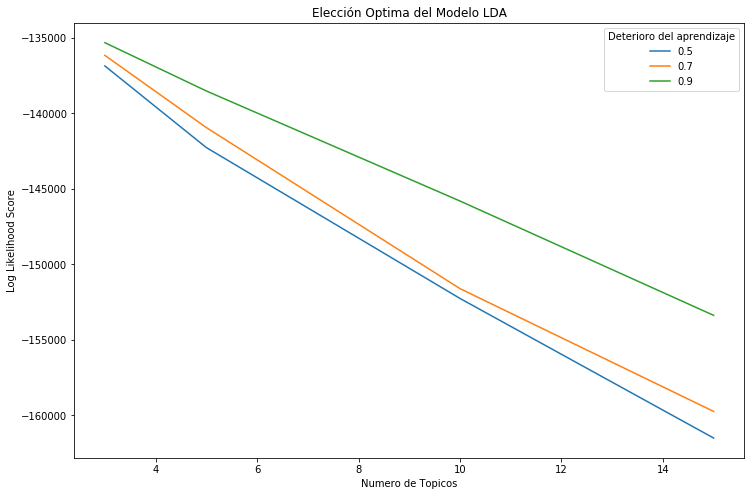

In [11]:
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

# Get Log Likelyhoods from Grid Search Output
n_topics = [3, 5, 10, 15]
log_likelyhoods_5 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if (gscore.parameters['learning_decay']==0.5 and gscore.parameters['max_iter']==10)]
log_likelyhoods_7 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if (gscore.parameters['learning_decay']==0.7 and gscore.parameters['max_iter']==10)]
log_likelyhoods_9 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if (gscore.parameters['learning_decay']==0.9 and gscore.parameters['max_iter']==10)]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, np.array(log_likelyhoods_5), label='0.5')
plt.plot(n_topics, np.array(log_likelyhoods_7), label='0.7')
plt.plot(n_topics, np.array(log_likelyhoods_9), label='0.9')
plt.title("Elección Optima del Modelo LDA")
#plt.xlim(xmin=0.0, xmax=15)
plt.xlabel("Numero de Topicos")
plt.ylabel("Log Likelihood Score")
plt.legend(title='Deterioro del aprendizaje', loc='best')
plt.show()

**Definicion de la Funcion para mostrar los topicos:**

In [12]:
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*90)

**Identificación de Topicos:** Definicion de parametros y llamada a la Funcion

In [21]:
n_top_words = 35
print("\nTopics in LDA model: ")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(best_lda_model, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:item revenue credit retrieve payment order method charge field refund schedule invoice minor version specify number entry preview href generate summary parameter journal send header accounting target information adjustment date subscription suspend model result default

Topic #1:get specified resource information search group given return fabric project specific detail application account node existing file endpoint update available associated cluster player deletes report using collection date image creates certificate status template azure time

Topic #2:subscription operation entity invoice account version payment item revenue event product oauth cancel schedule multi tenant preview access plan minor field object resume authentication rate period accounting charge renew collect azure credit following email billing


**Visualizacion de Topicos Dominantes por Documento:**

In [22]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np

# Create Document - Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)

# column names
topicnames = ['Topic' + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ['Doc' + str(i) for i in range(len(new_data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['Topic_dom'] = dominant_topic

# Styling
def color_green(val):
    color = 'red' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(20).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic_dom
Doc0,0.58,0.39,0.03,0
Doc1,0.1,0.58,0.33,1
Doc2,0,1,0,1
Doc3,0.06,0.89,0.06,1
Doc4,0.37,0.61,0.01,1
Doc5,0.37,0.61,0.01,1
Doc6,0.37,0.61,0.01,1
Doc7,0.52,0.47,0.01,0
Doc8,0.52,0.47,0.01,0
Doc9,0.34,0.65,0.02,1


**Distribucion cruzada:** numero de documentos en los que aparece un determinado topico.

In [23]:
df_topic_distribution = df_document_topic['Topic_dom'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topico Num', 'Num Documentos']
df_topic_distribution

,Topico Num,Num Documentos
0,1,660
1,2,234
2,0,132


**Visualización del Tópico dominante:**

In [24]:
topico_dom = best_lda_model.components_[1]
topic_words = [tf_feature_names[i] for i in topico_dom.argsort()[:-50 - 1 :-1]]
topico_dom.shape #NUMERO DE CARACTERISTICAS, ES IGUAL PARA LOS 10 TOPICOS

(2134,)

**Generacion de WordCloud:** para el primer topico (topico 0).

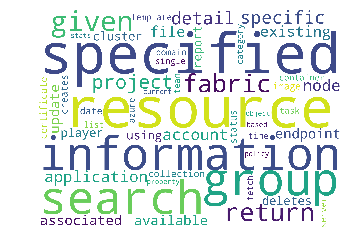

In [25]:
#FINALMENTE: conda install -c conda-forge wordcloud 
#SI PERSISTE EL ERROR: La version de pillow tiene q ser 5.2.. revisar en Anaconda3/Lic/site-package
#Y ACTUALIZAR LOS PAQUETES PIL Y PILLOW.

import os
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

firstcloud = WordCloud(
                          background_color='white',
                          width=2500,
                          height=1800
                         ).generate(" ".join(topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()